In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img

import numpy as np

import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#set the dataset path
data_dir = "tea sickness dataset"

In [3]:
#set image size batch size for pre processing
img_height,img_width=180,180
batch_size=32

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "tea sickness dataset",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 885 files belonging to 8 classes.
Using 708 files for training.


In [5]:
class_names = train_ds.class_names
class_names

['Anthracnose',
 'algal leaf',
 'bird eye spot',
 'brown blight',
 'gray light',
 'healthy',
 'red leaf spot',
 'white spot']

In [6]:
#devide dataset for validation 
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 885 files belonging to 8 classes.
Using 177 files for validation.


In [7]:
#our dataset have 7 classes
num_classes = 8

In [8]:
#set the image scale and size for model
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [9]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
#fit the model
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


C:\Users\jayanth\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 35s 1s/step - loss: 2.1288 - accuracy: 0.2585 - val_loss: 1.4908 - val_accuracy: 0.3898
Epoch 2/15
23/23 [==============================] - 21s 835ms/step - loss: 1.2655 - accuracy: 0.4605 - val_loss: 1.2441 - val_accuracy: 0.4237
Epoch 3/15
23/23 [==============================] - 22s 821ms/step - loss: 1.0136 - accuracy: 0.5452 - val_loss: 1.1117 - val_accuracy: 0.5085
Epoch 4/15
23/23 [==============================] - 26s 989ms/step - loss: 0.8599 - accuracy: 0.6483 - val_loss: 1.1493 - val_accuracy: 0.5367
Epoch 5/15
23/23 [==============================] - 27s 1s/step - loss: 0.7586 - accuracy: 0.6836 - val_loss: 0.8760 - val_accuracy: 0.6384
Epoch 6/15
23/23 [==============================] - 23s 870ms/step - loss: 0.6437 - accuracy: 0.7599 - val_loss: 0.9155 - val_accuracy: 0.6610
Epoch 7/15
23/23 [==============================] - 21s 805ms/step - loss: 0.5240 - accuracy: 0.8136 - val_loss: 0.8886 - val_accuracy: 0.6271
Epoch 8/15
23/23

In [11]:
#finally save the model
tf.keras.models.save_model(model,'tea.hdf5')

In [12]:
# ======        for prediction using our trained model ============================================






from matplotlib import pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

filepath = './tea.hdf5'
model = load_model(filepath)
print(model)

print("Model Loaded Successfully")

Model Loaded Successfully


1/1 [==============================] - 0s 193ms/step
white spot


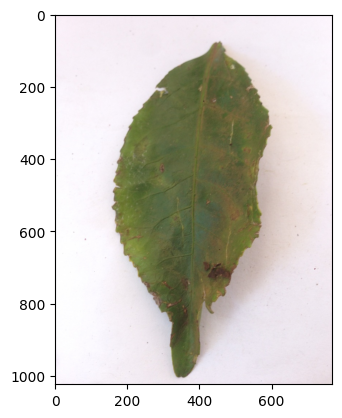

In [13]:
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (180,180)) # load image 

    test_image = img_to_array(test_image)#/255 # convert image to np array and normalize
    test_image = np.expand_dims(test_image, axis = 0)# change dimention 3D to 4D

    result = model.predict(test_image) # predict diseased palnt or not
    #print(result) 

    pred = np.argmax(result, axis=1)
    pred = pred[0]

    expression = ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot','white spot']

    test_image = img.imread(test_img_path)
    print(expression[pred])
    plt.imshow(test_image)
predict('tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_88.jpg')

1/1 [==============================] - 0s 207ms/step
algal leaf


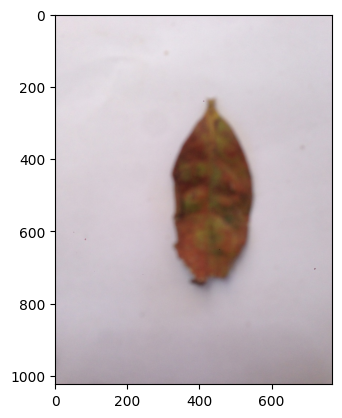

In [14]:
predict("tea sickness dataset/algal leaf/UNADJUSTEDNONRAW_thumb_15.jpg")

1/1 [==============================] - 0s 261ms/step
red leaf spot


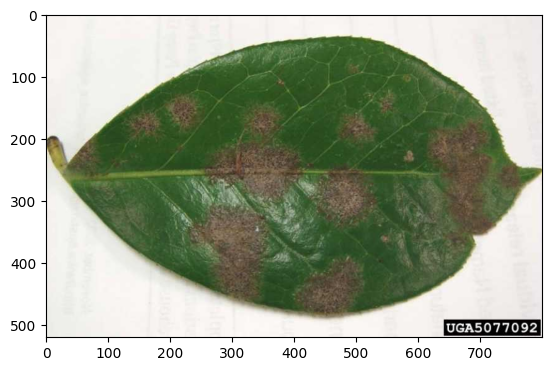

In [15]:
predict("tea sickness dataset/image1.jpg")

1/1 [==============================] - 0s 237ms/step
bird eye spot


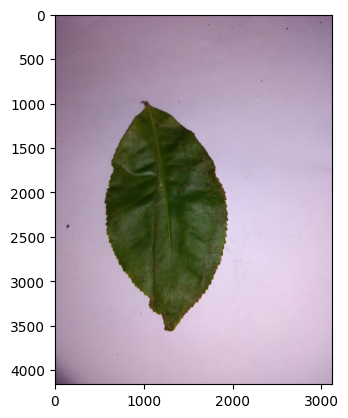

In [17]:
predict("tea sickness dataset/bird eye spot/IMG_20220503_154020.jpg")

1/1 [==============================] - 0s 235ms/step
brown blight


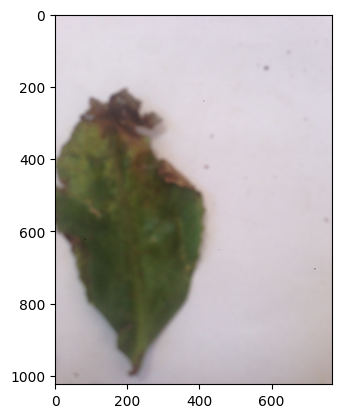

In [18]:
predict("tea sickness dataset/brown blight/UNADJUSTEDNONRAW_thumb_10b.jpg")

1/1 [==============================] - 0s 149ms/step
algal leaf


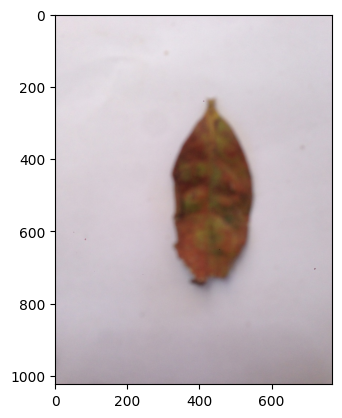

In [19]:
predict("tea sickness dataset/algal leaf/UNADJUSTEDNONRAW_thumb_15.jpg")

1/1 [==============================] - 0s 57ms/step
algal leaf


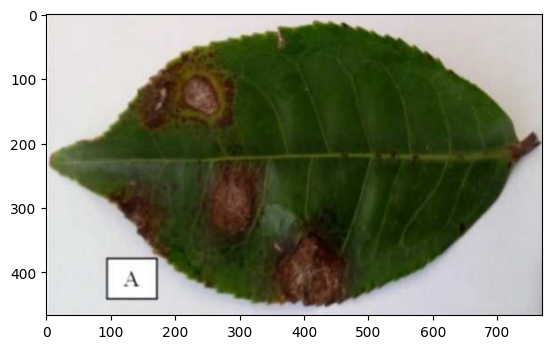

In [22]:
predict("tea sickness dataset/Screenshot 2023-05-11 213633.png")